# Density Matrix Formalism in Quantum Mechanics

## Introduction

The **density matrix** (or density operator) is a fundamental tool in quantum mechanics that provides a complete description of quantum systems, particularly when dealing with **mixed states** and **statistical ensembles**. Unlike the state vector formalism, which is limited to pure states, the density matrix formalism can describe both pure and mixed quantum states in a unified framework.

## Theoretical Foundation

### Pure States and State Vectors

For a pure quantum state $|\psi\rangle$, the density matrix is defined as the outer product:

$$\rho = |\psi\rangle\langle\psi|$$

This is a projection operator onto the state $|\psi\rangle$.

### Mixed States

A mixed state represents a statistical ensemble of pure states $\{|\psi_i\rangle\}$ with classical probabilities $\{p_i\}$:

$$\rho = \sum_i p_i |\psi_i\rangle\langle\psi_i|$$

where $\sum_i p_i = 1$ and $p_i \geq 0$.

### Properties of Density Matrices

A valid density matrix must satisfy:

1. **Hermiticity**: $\rho = \rho^\dagger$
2. **Unit trace**: $\text{Tr}(\rho) = 1$
3. **Positive semi-definiteness**: $\langle\phi|\rho|\phi\rangle \geq 0$ for all $|\phi\rangle$

### Purity

The **purity** of a quantum state is defined as:

$$\gamma = \text{Tr}(\rho^2)$$

- For pure states: $\gamma = 1$ (since $\rho^2 = \rho$)
- For mixed states: $\frac{1}{d} \leq \gamma < 1$, where $d$ is the Hilbert space dimension

### Von Neumann Entropy

The **von Neumann entropy** quantifies the amount of quantum uncertainty:

$$S(\rho) = -\text{Tr}(\rho \ln \rho) = -\sum_i \lambda_i \ln \lambda_i$$

where $\lambda_i$ are the eigenvalues of $\rho$.

- For pure states: $S = 0$
- For maximally mixed states: $S = \ln d$

### Time Evolution

The density matrix evolves according to the **von Neumann equation**:

$$\frac{d\rho}{dt} = -\frac{i}{\hbar}[H, \rho]$$

where $H$ is the Hamiltonian and $[A, B] = AB - BA$ is the commutator.

### Expectation Values

The expectation value of an observable $\hat{O}$ is:

$$\langle \hat{O} \rangle = \text{Tr}(\rho \hat{O})$$

## Computational Implementation

We will now implement density matrix operations and visualize key quantum mechanical properties for various quantum states.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Set random seed for reproducibility
np.random.seed(42)

# Define Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
identity = np.eye(2, dtype=complex)

print("Pauli Matrices:")
print("σ_x =", sigma_x)
print("σ_y =", sigma_y)
print("σ_z =", sigma_z)

Pauli Matrices:
σ_x = [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
σ_y = [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
σ_z = [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


In [2]:
def create_pure_state_density_matrix(state_vector):
    """Create density matrix from a pure state vector."""
    state = np.array(state_vector, dtype=complex).reshape(-1, 1)
    state = state / np.linalg.norm(state)  # Normalize
    return state @ state.conj().T

def create_mixed_state(states, probabilities):
    """Create density matrix for a mixed state."""
    rho = np.zeros_like(states[0], dtype=complex)
    for state, prob in zip(states, probabilities):
        rho += prob * state
    return rho

def purity(rho):
    """Calculate the purity Tr(ρ²)."""
    return np.real(np.trace(rho @ rho))

def von_neumann_entropy(rho):
    """Calculate von Neumann entropy S = -Tr(ρ ln ρ)."""
    eigenvalues = np.linalg.eigvalsh(rho)
    # Filter out zero eigenvalues to avoid log(0)
    eigenvalues = eigenvalues[eigenvalues > 1e-10]
    return -np.sum(eigenvalues * np.log(eigenvalues))

def expectation_value(rho, observable):
    """Calculate ⟨O⟩ = Tr(ρO)."""
    return np.real(np.trace(rho @ observable))

## Example 1: Pure States

Let's create density matrices for the computational basis states $|0\rangle$ and $|1\rangle$, as well as the superposition state $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$.

In [3]:
# Define basis states
ket_0 = np.array([1, 0], dtype=complex)
ket_1 = np.array([0, 1], dtype=complex)
ket_plus = np.array([1, 1], dtype=complex) / np.sqrt(2)
ket_minus = np.array([1, -1], dtype=complex) / np.sqrt(2)

# Create density matrices for pure states
rho_0 = create_pure_state_density_matrix(ket_0)
rho_1 = create_pure_state_density_matrix(ket_1)
rho_plus = create_pure_state_density_matrix(ket_plus)

print("Density matrix for |0⟩:")
print(rho_0)
print(f"Purity: {purity(rho_0):.4f}")
print(f"von Neumann Entropy: {von_neumann_entropy(rho_0):.4f}")
print()

print("Density matrix for |+⟩ = (|0⟩ + |1⟩)/√2:")
print(rho_plus)
print(f"Purity: {purity(rho_plus):.4f}")
print(f"von Neumann Entropy: {von_neumann_entropy(rho_plus):.4f}")

Density matrix for |0⟩:
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Purity: 1.0000
von Neumann Entropy: -0.0000

Density matrix for |+⟩ = (|0⟩ + |1⟩)/√2:
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]
Purity: 1.0000
von Neumann Entropy: -0.0000


## Example 2: Mixed States

Now let's create a mixed state that represents a classical mixture of $|0\rangle$ and $|1\rangle$ with probabilities $p$ and $1-p$:

$$\rho_{\text{mixed}} = p|0\rangle\langle 0| + (1-p)|1\rangle\langle 1|$$

In [4]:
# Create mixed state with p = 0.7
p = 0.7
rho_mixed = create_mixed_state([rho_0, rho_1], [p, 1-p])

print(f"Mixed state density matrix (p = {p}):")
print(rho_mixed)
print(f"Purity: {purity(rho_mixed):.4f}")
print(f"von Neumann Entropy: {von_neumann_entropy(rho_mixed):.4f}")
print()

# Maximally mixed state (p = 0.5)
rho_max_mixed = create_mixed_state([rho_0, rho_1], [0.5, 0.5])
print("Maximally mixed state (p = 0.5):")
print(rho_max_mixed)
print(f"Purity: {purity(rho_max_mixed):.4f}")
print(f"von Neumann Entropy: {von_neumann_entropy(rho_max_mixed):.4f}")
print(f"Maximum possible entropy (ln 2): {np.log(2):.4f}")

Mixed state density matrix (p = 0.7):
[[0.7+0.j 0. +0.j]
 [0. +0.j 0.3+0.j]]
Purity: 0.5800
von Neumann Entropy: 0.6109

Maximally mixed state (p = 0.5):
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
Purity: 0.5000
von Neumann Entropy: 0.6931
Maximum possible entropy (ln 2): 0.6931


## Bloch Sphere Representation

Any single-qubit density matrix can be parameterized using the Bloch vector $\vec{r} = (r_x, r_y, r_z)$:

$$\rho = \frac{1}{2}(I + \vec{r} \cdot \vec{\sigma}) = \frac{1}{2}(I + r_x\sigma_x + r_y\sigma_y + r_z\sigma_z)$$

The Bloch vector components are:
- $r_x = \text{Tr}(\rho\sigma_x)$
- $r_y = \text{Tr}(\rho\sigma_y)$
- $r_z = \text{Tr}(\rho\sigma_z)$

For pure states, $|\vec{r}| = 1$ (on the surface of the Bloch sphere).  
For mixed states, $|\vec{r}| < 1$ (inside the Bloch sphere).

In [5]:
def get_bloch_vector(rho):
    """Extract Bloch vector from density matrix."""
    rx = expectation_value(rho, sigma_x)
    ry = expectation_value(rho, sigma_y)
    rz = expectation_value(rho, sigma_z)
    return np.array([rx, ry, rz])

def density_from_bloch(r):
    """Create density matrix from Bloch vector."""
    return 0.5 * (identity + r[0]*sigma_x + r[1]*sigma_y + r[2]*sigma_z)

# Calculate Bloch vectors for our states
states_info = [
    (rho_0, "|0⟩"),
    (rho_1, "|1⟩"),
    (rho_plus, "|+⟩"),
    (rho_mixed, f"Mixed (p={p})"),
    (rho_max_mixed, "Maximally mixed")
]

print("Bloch vectors:")
for rho, name in states_info:
    r = get_bloch_vector(rho)
    print(f"{name}: r = ({r[0]:.3f}, {r[1]:.3f}, {r[2]:.3f}), |r| = {np.linalg.norm(r):.3f}")

Bloch vectors:
|0⟩: r = (0.000, 0.000, 1.000), |r| = 1.000
|1⟩: r = (0.000, 0.000, -1.000), |r| = 1.000
|+⟩: r = (1.000, 0.000, 0.000), |r| = 1.000
Mixed (p=0.7): r = (0.000, 0.000, 0.400), |r| = 0.400
Maximally mixed: r = (0.000, 0.000, 0.000), |r| = 0.000


## Time Evolution: Rabi Oscillations

Let's simulate the time evolution of a qubit under a Hamiltonian that induces Rabi oscillations:

$$H = \frac{\hbar\omega}{2}\sigma_x$$

The time evolution operator is:

$$U(t) = e^{-iHt/\hbar} = e^{-i\omega t \sigma_x/2}$$

In [6]:
def evolve_density_matrix(rho_0, H, t, hbar=1):
    """Evolve density matrix under Hamiltonian H for time t."""
    U = expm(-1j * H * t / hbar)
    return U @ rho_0 @ U.conj().T

# Rabi oscillation simulation
omega = 2 * np.pi  # Angular frequency
H_rabi = 0.5 * omega * sigma_x  # Hamiltonian (hbar = 1)

# Time array
t_max = 2.0
t_array = np.linspace(0, t_max, 200)

# Initial state |0⟩
rho_initial = rho_0

# Track expectation values
exp_x = []
exp_y = []
exp_z = []
purities = []

for t in t_array:
    rho_t = evolve_density_matrix(rho_initial, H_rabi, t)
    exp_x.append(expectation_value(rho_t, sigma_x))
    exp_y.append(expectation_value(rho_t, sigma_y))
    exp_z.append(expectation_value(rho_t, sigma_z))
    purities.append(purity(rho_t))

print(f"Rabi oscillation with ω = {omega:.2f} rad/s")
print(f"Period T = 2π/ω = {2*np.pi/omega:.2f} s")

Rabi oscillation with ω = 6.28 rad/s
Period T = 2π/ω = 1.00 s


## Visualization

We now create comprehensive visualizations showing:
1. Rabi oscillations of expectation values
2. Purity and entropy as functions of mixing parameter
3. 3D Bloch sphere representation

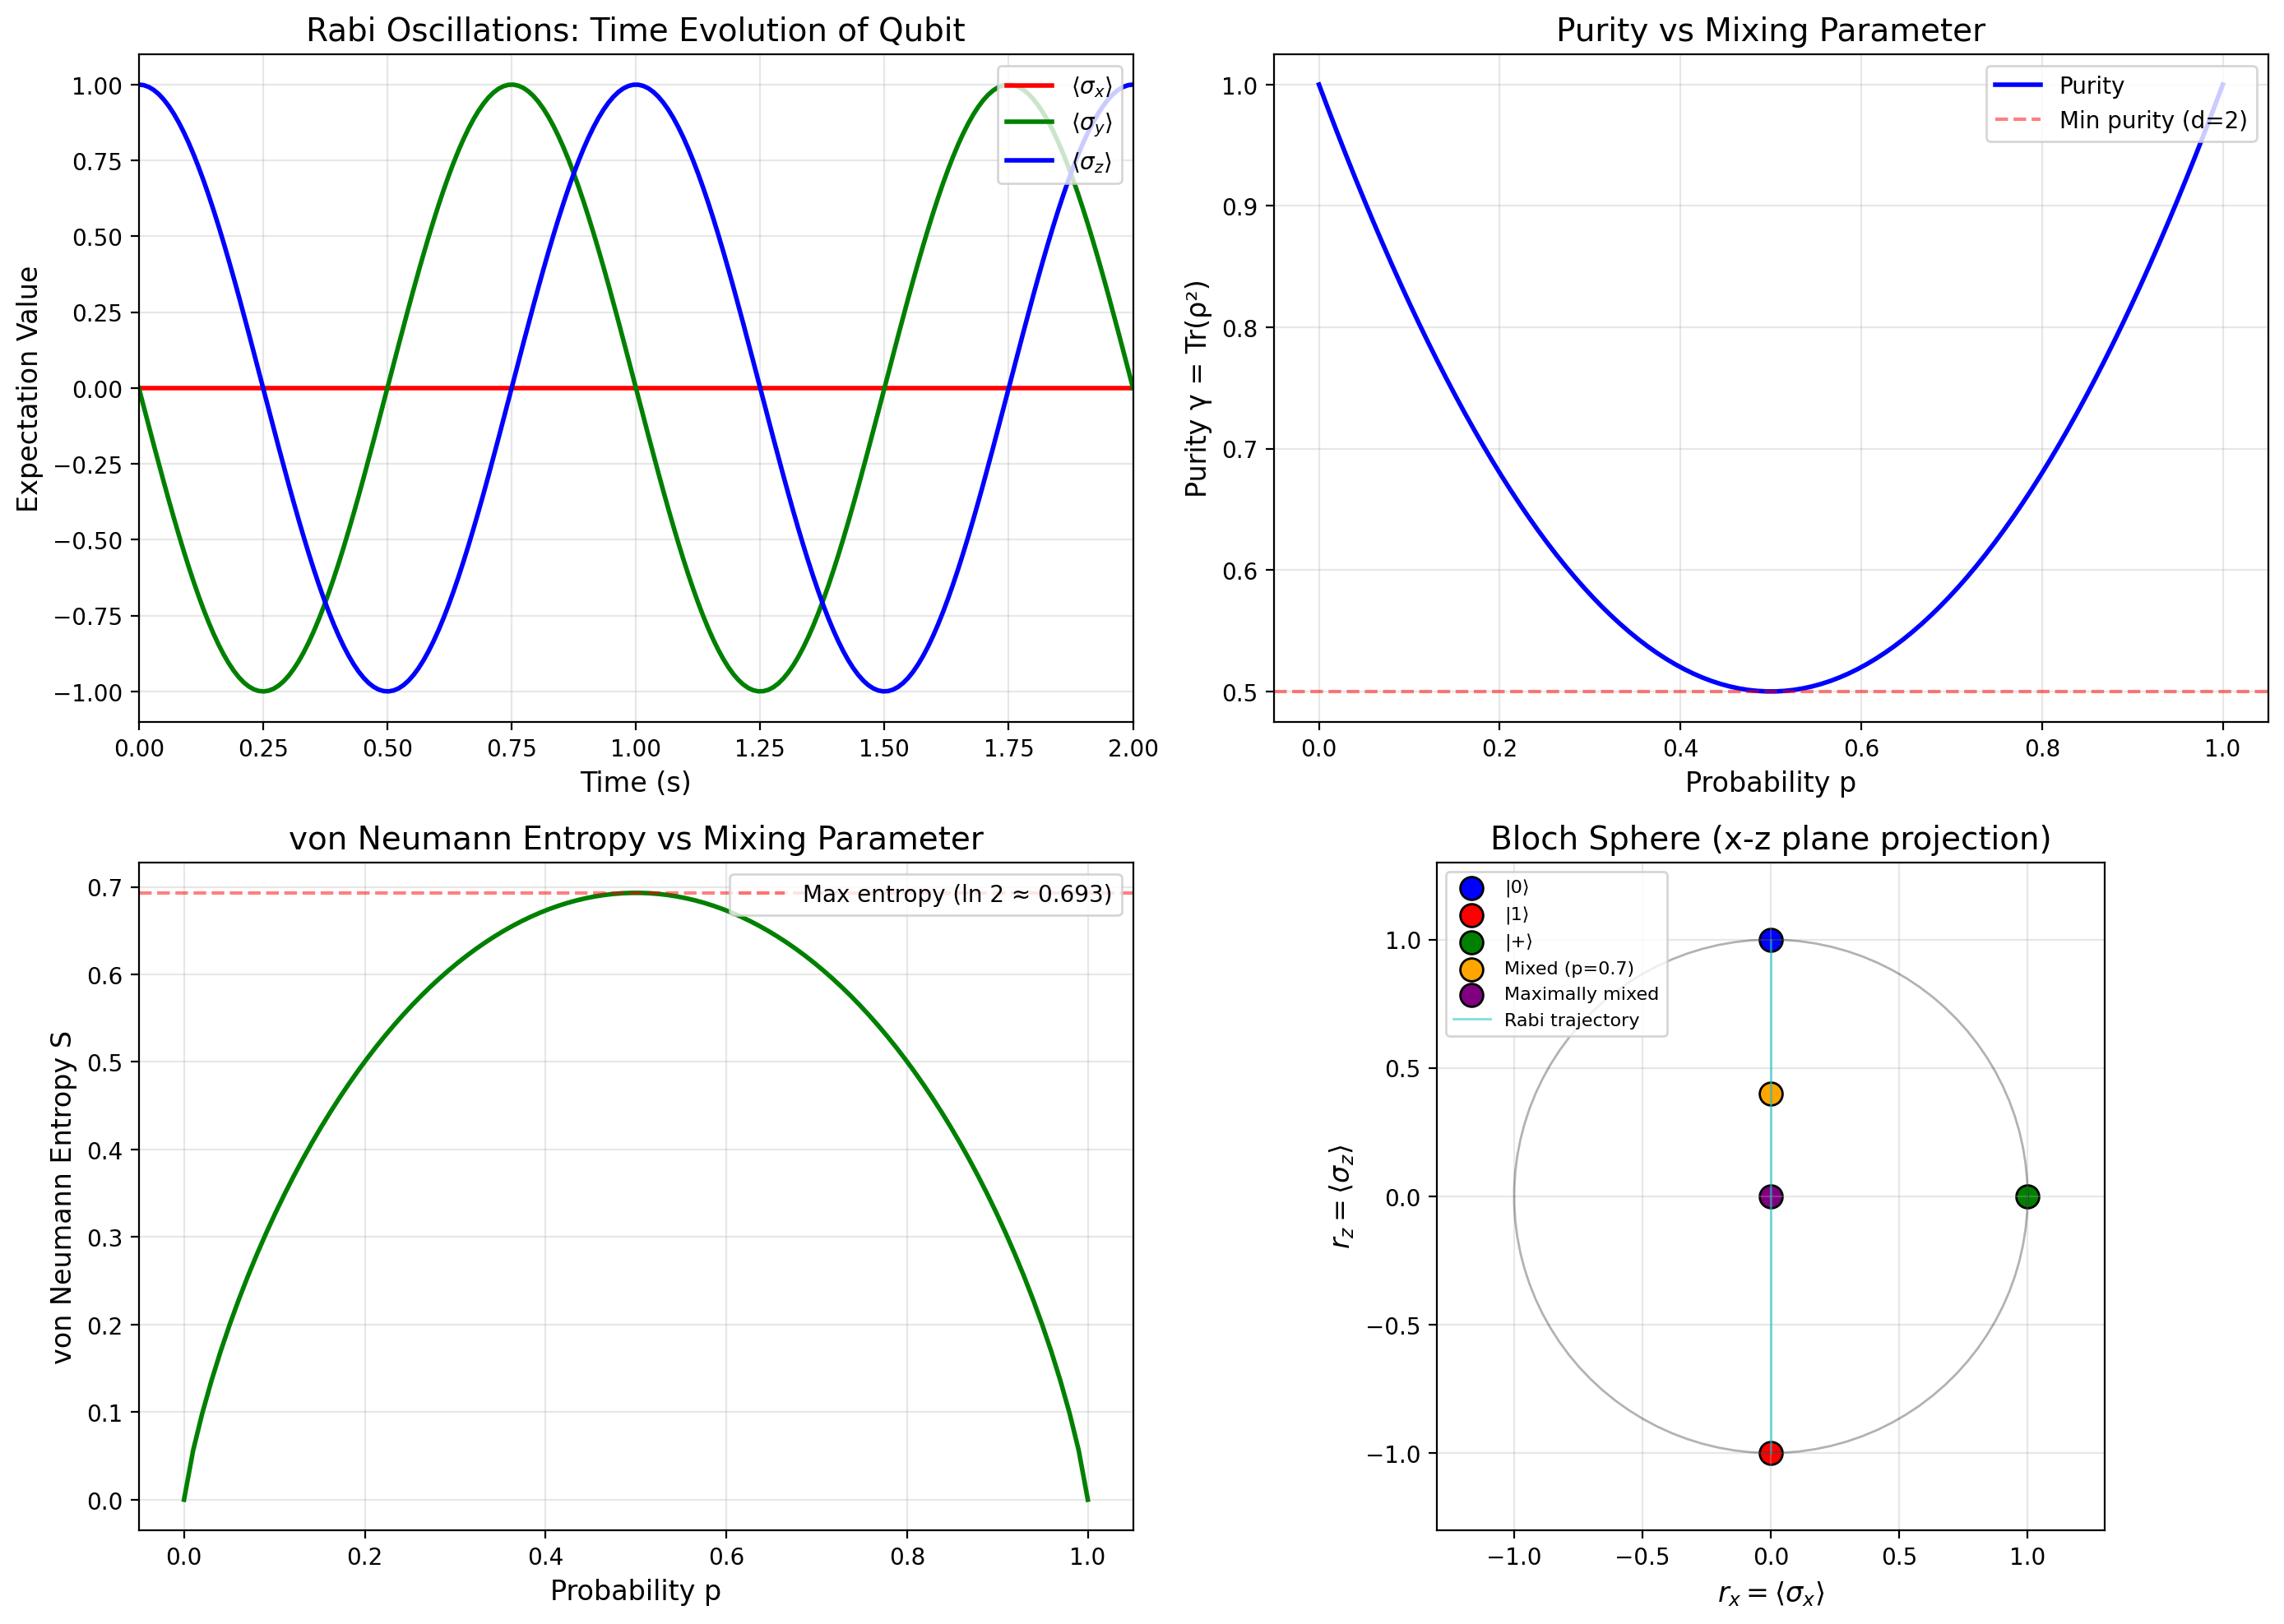


Figure saved to 'plot.png'


In [7]:
# Create comprehensive figure
fig = plt.figure(figsize=(14, 10))

# Plot 1: Rabi Oscillations
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(t_array, exp_x, 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax1.plot(t_array, exp_y, 'g-', label=r'$\langle\sigma_y\rangle$', linewidth=2)
ax1.plot(t_array, exp_z, 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Expectation Value', fontsize=12)
ax1.set_title('Rabi Oscillations: Time Evolution of Qubit', fontsize=14)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, t_max])
ax1.set_ylim([-1.1, 1.1])

# Plot 2: Purity vs Mixing Parameter
ax2 = fig.add_subplot(2, 2, 2)
p_values = np.linspace(0, 1, 100)
purities_vs_p = []
entropies_vs_p = []

for p_val in p_values:
    rho_p = create_mixed_state([rho_0, rho_1], [p_val, 1-p_val])
    purities_vs_p.append(purity(rho_p))
    entropies_vs_p.append(von_neumann_entropy(rho_p))

ax2.plot(p_values, purities_vs_p, 'b-', label='Purity', linewidth=2)
ax2.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Min purity (d=2)')
ax2.set_xlabel('Probability p', fontsize=12)
ax2.set_ylabel('Purity γ = Tr(ρ²)', fontsize=12)
ax2.set_title('Purity vs Mixing Parameter', fontsize=14)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Plot 3: Von Neumann Entropy vs Mixing Parameter
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(p_values, entropies_vs_p, 'g-', linewidth=2)
ax3.axhline(y=np.log(2), color='r', linestyle='--', alpha=0.5, label=f'Max entropy (ln 2 ≈ {np.log(2):.3f})')
ax3.set_xlabel('Probability p', fontsize=12)
ax3.set_ylabel('von Neumann Entropy S', fontsize=12)
ax3.set_title('von Neumann Entropy vs Mixing Parameter', fontsize=14)
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# Plot 4: Bloch Sphere Visualization (2D projection)
ax4 = fig.add_subplot(2, 2, 4)

# Draw unit circle (pure states boundary)
theta_circle = np.linspace(0, 2*np.pi, 100)
ax4.plot(np.cos(theta_circle), np.sin(theta_circle), 'k-', alpha=0.3, linewidth=1)

# Plot states in x-z plane
colors = ['blue', 'red', 'green', 'orange', 'purple']
for (rho, name), color in zip(states_info, colors):
    r = get_bloch_vector(rho)
    ax4.scatter(r[0], r[2], s=100, c=color, label=name, edgecolors='black', linewidth=1)

# Plot Rabi oscillation trajectory
traj_x = []
traj_z = []
for t in t_array[::5]:  # Sample every 5th point
    rho_t = evolve_density_matrix(rho_initial, H_rabi, t)
    r = get_bloch_vector(rho_t)
    traj_x.append(r[0])
    traj_z.append(r[2])

ax4.plot(traj_x, traj_z, 'c-', alpha=0.5, linewidth=1, label='Rabi trajectory')

ax4.set_xlabel(r'$r_x = \langle\sigma_x\rangle$', fontsize=12)
ax4.set_ylabel(r'$r_z = \langle\sigma_z\rangle$', fontsize=12)
ax4.set_title('Bloch Sphere (x-z plane projection)', fontsize=14)
ax4.legend(loc='upper left', fontsize=8)
ax4.grid(True, alpha=0.3)
ax4.set_xlim([-1.3, 1.3])
ax4.set_ylim([-1.3, 1.3])
ax4.set_aspect('equal')

plt.tight_layout()
plt.savefig('density_matrix_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Summary

This notebook demonstrated the fundamental concepts of density matrix formalism:

1. **Pure vs Mixed States**: Pure states have purity $\gamma = 1$ and zero entropy, while mixed states have $\gamma < 1$ and non-zero entropy.

2. **Bloch Representation**: Single-qubit states can be visualized on the Bloch sphere, with pure states on the surface and mixed states inside.

3. **Time Evolution**: The von Neumann equation governs unitary evolution, preserving purity for isolated systems.

4. **Quantum Entropy**: The von Neumann entropy quantifies quantum uncertainty and reaches its maximum for the maximally mixed state.

The density matrix formalism is essential for:
- Open quantum systems and decoherence
- Quantum statistical mechanics
- Quantum information and computation
- Quantum measurement theory